In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

from sklearn.model_selection import GridSearchCV

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## PLEASE GO THROUGH THE INITIAL PREPROCESSING FIRST BEFORE CONTINUING

In [ ]:
df_og= pd.read_csv("/content/drive/MyDrive/Health Insurance Analysis and predictions/Health_insurance.csv")
df = df_og.copy()

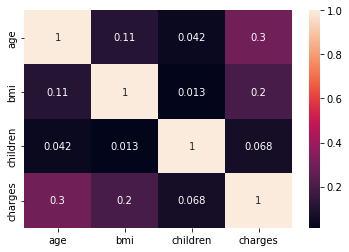

In [ ]:
sns.heatmap(df.corr(), annot = True)

In [ ]:
df["children"] = df["children"].astype(object)

In [ ]:
sex_le = LabelEncoder()
df['sex'] = sex_le.fit_transform(df['sex'])

smoker_le = LabelEncoder()
df['smoker'] = smoker_le.fit_transform(df['smoker'])

region_le = LabelEncoder()
df['region'] = region_le.fit_transform(df['region'])

df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [ ]:
sex_map = dict(zip(sex_le.classes_, sex_le.transform(sex_le.classes_)))
print(sex_map)
smoker_map = dict(zip(smoker_le.classes_, smoker_le.transform(smoker_le.classes_)))
print(smoker_map)
region_map = dict(zip(region_le.classes_, region_le.transform(region_le.classes_)))
print(region_map)

{0: 0, 1: 1}
{0: 0, 1: 1}
{0: 0, 1: 1, 2: 2, 3: 3}


In [ ]:
df.info()
## some categorical columns like region, sex, etc are now treated as numerical ones

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   object 
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   int64  
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(4), object(1)
memory usage: 73.3+ KB


In [ ]:
df["sex"] = df["sex"].astype(object)
df["smoker"] = df["smoker"].astype(object)
df["region"] = df["region"].astype(object)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   object 
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 73.3+ KB


In [ ]:
train = df.drop(['charges'], axis = 1)
test = df['charges']

In [ ]:
# X_train, X_test, Y_train, Y_test = train_test_split(train, test, test_size = 0.2, random_state = 0)

## Not required in Grid Search CV which employs K folds Cross Validation

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
## Feature scaling by Standardization

sscaler = StandardScaler()
X_train = sscaler.fit_transform(train.astype(float))
# X_test = sscaler.transform(X_test.astype(float))

In [ ]:
len(X_train)

1338

In [ ]:
len(test)

1338

In [ ]:
model_params = {
    'svr': {
        'model': SVR(gamma='auto'),
        'params' : {
            'C': [1,10,20],
            'kernel': ['rbf','linear','poly']
        }  
    },
    'random_forest_regressor': {
        'model': RandomForestRegressor(),
        'params' : {
            'n_estimators': [1,5,10,20]
        }
    },
    'linear_regression' : {
        'model': LinearRegression(),
        'params': []
    },
    'decision_tree_regressor':{
        'model': DecisionTreeRegressor(),
        'params': {
            'criterion' : ['squared_error', 'absolute_error'],
            'min_samples_split': [2,4]
        }
    }

}

##**Hyper Parameter Tuned Linear Regression Model**

In [ ]:
parameters = {}  

lin_reg = GridSearchCV(LinearRegression(), param_grid= parameters, cv=5, return_train_score=False)

lin_reg.fit(X_train, test)

df_lin_reg = pd.DataFrame(lin_reg.cv_results_)
df_lin_reg

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.006801,0.011325,0.000577,0.00018,{},0.76124,0.708387,0.777868,0.733652,0.755134,0.747256,0.024044,1


In [ ]:
print(f"Model: Linear Regression")
print(f"Best Score : {lin_reg.best_score_}")
print(f"Best Parameters : {lin_reg.best_params_}")

Model: Linear Regression
Best Score : 0.7472559473580954
Best Parameters : {}


##**Hyper parameter Tuned Random Forest Regressor Model**

In [ ]:
parameters = {
    'n_estimators': [10, 50, 100, 150],
    'criterion' : ['squared_error', 'absolute_error', 'poisson'],
    'min_samples_split': [1,2,4],
    'min_samples_leaf': [1,2,4]
}

rfr = GridSearchCV(RandomForestRegressor(), param_grid= parameters, cv=5, return_train_score=False)

rfr.fit(X_train, test)

df_rfr = pd.DataFrame(rfr.cv_results_)
df_rfr

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
180 fits failed out of a total of 540.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
180 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py", line 467, in fit
    for i, t in enumerate(trees)
  File "/usr/local/lib/python3.7/dist-packages/joblib/parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "/usr/local/lib/python3.7/dist-packages/joblib/p

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.006750,0.002059,0.000000,0.000000,squared_error,1,1,10,"{'criterion': 'squared_error', 'min_samples_le...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,108
1,0.019190,0.000455,0.000000,0.000000,squared_error,1,1,50,"{'criterion': 'squared_error', 'min_samples_le...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,74
2,0.035747,0.001254,0.000000,0.000000,squared_error,1,1,100,"{'criterion': 'squared_error', 'min_samples_le...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,73
3,0.052676,0.001996,0.000000,0.000000,squared_error,1,1,150,"{'criterion': 'squared_error', 'min_samples_le...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,104
4,0.030990,0.000224,0.002543,0.000069,squared_error,1,2,10,"{'criterion': 'squared_error', 'min_samples_le...",0.838162,0.759201,0.862219,0.807258,0.837938,0.820955,0.035464,64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,0.678742,0.018906,0.019019,0.000455,poisson,4,2,150,"{'criterion': 'poisson', 'min_samples_leaf': 4...",0.864373,0.786901,0.871508,0.840542,0.841764,0.841017,0.029680,30
104,0.046180,0.001939,0.002648,0.000425,poisson,4,4,10,"{'criterion': 'poisson', 'min_samples_leaf': 4...",0.866336,0.773685,0.869556,0.835822,0.838430,0.836766,0.034445,43
105,0.228593,0.007097,0.007051,0.000125,poisson,4,4,50,"{'criterion': 'poisson', 'min_samples_leaf': 4...",0.863508,0.783311,0.873093,0.839325,0.843081,0.840464,0.031210,33
106,0.452059,0.009987,0.014153,0.002479,poisson,4,4,100,"{'criterion': 'poisson', 'min_samples_leaf': 4...",0.863779,0.781858,0.871921,0.840035,0.844051,0.840329,0.031562,34


In [ ]:
df_rfr[['params','param_n_estimators','param_criterion','mean_test_score', 'rank_test_score']].sort_values(by = 'rank_test_score').dropna(axis = 0)

,params,param_n_estimators,param_criterion,mean_test_score,rank_test_score
71,"{'criterion': 'absolute_error', 'min_samples_l...",150,absolute_error,0.856537,1
70,"{'criterion': 'absolute_error', 'min_samples_l...",100,absolute_error,0.856330,2
66,"{'criterion': 'absolute_error', 'min_samples_l...",100,absolute_error,0.856160,3
65,"{'criterion': 'absolute_error', 'min_samples_l...",50,absolute_error,0.856036,4
69,"{'criterion': 'absolute_error', 'min_samples_l...",50,absolute_error,0.855734,5
...,...,...,...,...,...
79,"{'criterion': 'poisson', 'min_samples_leaf': 1...",150,poisson,0.810502,68
77,"{'criterion': 'poisson', 'min_samples_leaf': 1...",50,poisson,0.809966,69
78,"{'criterion': 'poisson', 'min_samples_leaf': 1...",100,poisson,0.809054,70
80,"{'criterion': 'poisson', 'min_samples_leaf': 1...",10,poisson,0.808035,71


In [ ]:
print(f"Model: Random Forest Regressor")
print(f"Best Score : {rfr.best_score_}")
print(f"Best Parameters : {rfr.best_params_}")

Model: Random Forest Regressor
Best Score : 0.8565366196972354
Best Parameters : {'criterion': 'absolute_error', 'min_samples_leaf': 4, 'min_samples_split': 4, 'n_estimators': 150}


##**Hyper Parameter Tuned SVR  Model**

In [ ]:
parameters = {
    'C': [10,50, 100, 200, 300, 400],
    'kernel': ['rbf','linear','poly']
}  

svr = GridSearchCV(SVR(gamma='auto'), param_grid= parameters, cv=5, return_train_score=False)

svr.fit(X_train, test)

df_svr = pd.DataFrame(svr.cv_results_)
df_svr

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.175799,0.041830,0.039873,0.014947,10,rbf,"{'C': 10, 'kernel': 'rbf'}",-0.063560,-0.054594,-0.028370,-0.054259,-0.059397,-0.052036,0.012317,18
1,0.190596,0.021494,0.028714,0.002881,10,linear,"{'C': 10, 'kernel': 'linear'}",0.482277,0.471677,0.484216,0.475558,0.442716,0.471289,0.014984,12
2,0.091241,0.008631,0.015600,0.003280,10,poly,"{'C': 10, 'kernel': 'poly'}",-0.012621,-0.005430,0.017343,-0.007900,-0.015676,-0.004857,0.011660,17
3,0.124565,0.005263,0.031487,0.001692,50,rbf,"{'C': 50, 'kernel': 'rbf'}",0.119536,0.122455,0.147417,0.121915,0.102397,0.122744,0.014379,16
4,0.097432,0.003969,0.012683,0.000842,50,linear,"{'C': 50, 'kernel': 'linear'}",0.615091,0.574576,0.606537,0.591524,0.578063,0.593158,0.015722,9
5,0.090137,0.005481,0.014275,0.000101,50,poly,"{'C': 50, 'kernel': 'poly'}",0.304117,0.314722,0.311321,0.297330,0.284061,0.302310,0.010921,14
6,0.091929,0.022515,0.019958,0.005569,100,rbf,"{'C': 100, 'kernel': 'rbf'}",0.293435,0.289254,0.312462,0.288144,0.270757,0.290810,0.013322,15
7,0.059054,0.004083,0.006857,0.000063,100,linear,"{'C': 100, 'kernel': 'linear'}",0.638245,0.601368,0.627453,0.629019,0.593449,0.617907,0.017320,7
8,0.054462,0.002313,0.007762,0.000125,100,poly,"{'C': 100, 'kernel': 'poly'}",0.519342,0.517306,0.509660,0.495402,0.474591,0.503260,0.016616,11
9,0.080753,0.001861,0.017253,0.000220,200,rbf,"{'C': 200, 'kernel': 'rbf'}",0.483723,0.446966,0.473738,0.464254,0.453202,0.464377,0.013341,13


In [ ]:
df_svr[['param_C','param_kernel','params','mean_test_score', 'rank_test_score']].sort_values(by = 'rank_test_score')

,param_C,param_kernel,params,mean_test_score,rank_test_score
17,400,poly,"{'C': 400, 'kernel': 'poly'}",0.758846,1
14,300,poly,"{'C': 300, 'kernel': 'poly'}",0.728939,2
10,200,linear,"{'C': 200, 'kernel': 'linear'}",0.714869,3
13,300,linear,"{'C': 300, 'kernel': 'linear'}",0.688582,4
16,400,linear,"{'C': 400, 'kernel': 'linear'}",0.673185,5
11,200,poly,"{'C': 200, 'kernel': 'poly'}",0.669040,6
7,100,linear,"{'C': 100, 'kernel': 'linear'}",0.617907,7
15,400,rbf,"{'C': 400, 'kernel': 'rbf'}",0.595458,8
4,50,linear,"{'C': 50, 'kernel': 'linear'}",0.593158,9
12,300,rbf,"{'C': 300, 'kernel': 'rbf'}",0.544235,10


In [ ]:
print(f"Model: SVR")
print(f"Best Score : {svr.best_score_}")
print(f"Best Parameters : {svr.best_params_}")

Model: SVR
Best Score : 0.758845558589656
Best Parameters : {'C': 400, 'kernel': 'poly'}


## **Hyper Parameter Tuned Decision Tree Regression Model**

In [ ]:
parameters = {
    'criterion' : ['squared_error', 'absolute_error'],
    'min_samples_split': [2,4],
    'max_features' : ['auto','sqrt', None]
}

dtr = GridSearchCV(DecisionTreeRegressor(), param_grid= parameters, cv=5, return_train_score=False)

dtr.fit(X_train, test)

df_dtr = pd.DataFrame(dtr.cv_results_)
df_dtr

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_features,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.004059,0.000560,0.000698,0.000123,squared_error,auto,2,"{'criterion': 'squared_error', 'max_features':...",0.773025,0.670716,0.753295,0.698726,0.666738,0.712500,0.043260,8
1,0.003284,0.000091,0.000585,0.000014,squared_error,auto,4,"{'criterion': 'squared_error', 'max_features':...",0.788285,0.704076,0.767260,0.737734,0.729797,0.745431,0.029417,3
2,0.002379,0.000194,0.000607,0.000022,squared_error,sqrt,2,"{'criterion': 'squared_error', 'max_features':...",0.757412,0.445350,0.591546,0.705133,0.697632,0.639415,0.110981,12
3,0.001849,0.000056,0.000582,0.000075,squared_error,sqrt,4,"{'criterion': 'squared_error', 'max_features':...",0.697591,0.665232,0.845460,0.568789,0.625531,0.680520,0.092992,10
4,0.003621,0.000029,0.000553,0.000009,squared_error,None,2,"{'criterion': 'squared_error', 'max_features':...",0.758271,0.664032,0.735117,0.738221,0.669222,0.712973,0.038702,7
5,0.003194,0.000067,0.000535,0.000020,squared_error,None,4,"{'criterion': 'squared_error', 'max_features':...",0.788482,0.675045,0.764664,0.740966,0.723415,0.738514,0.038582,5
6,0.031516,0.000358,0.000967,0.000149,absolute_error,auto,2,"{'criterion': 'absolute_error', 'max_features'...",0.782108,0.633504,0.742625,0.713347,0.752414,0.724800,0.050657,6
7,0.030098,0.000390,0.000792,0.000017,absolute_error,auto,4,"{'criterion': 'absolute_error', 'max_features'...",0.796930,0.717582,0.789354,0.740790,0.790305,0.766992,0.031836,1
8,0.016387,0.002909,0.000805,0.000155,absolute_error,sqrt,2,"{'criterion': 'absolute_error', 'max_features'...",0.713924,0.627520,0.684773,0.412341,0.776535,0.643019,0.124940,11
9,0.014887,0.001626,0.000722,0.000040,absolute_error,sqrt,4,"{'criterion': 'absolute_error', 'max_features'...",0.640264,0.649928,0.659715,0.746476,0.761635,0.691604,0.051585,9


In [ ]:
df_dtr[['params','mean_test_score','param_criterion', 'param_max_features', 'param_min_samples_split', 'rank_test_score']].sort_values(by = 'rank_test_score')

,params,mean_test_score,param_criterion,param_max_features,param_min_samples_split,rank_test_score
7,"{'criterion': 'absolute_error', 'max_features'...",0.766992,absolute_error,auto,4,1
11,"{'criterion': 'absolute_error', 'max_features'...",0.757509,absolute_error,None,4,2
1,"{'criterion': 'squared_error', 'max_features':...",0.745431,squared_error,auto,4,3
10,"{'criterion': 'absolute_error', 'max_features'...",0.743739,absolute_error,None,2,4
5,"{'criterion': 'squared_error', 'max_features':...",0.738514,squared_error,None,4,5
6,"{'criterion': 'absolute_error', 'max_features'...",0.724800,absolute_error,auto,2,6
4,"{'criterion': 'squared_error', 'max_features':...",0.712973,squared_error,None,2,7
0,"{'criterion': 'squared_error', 'max_features':...",0.712500,squared_error,auto,2,8
9,"{'criterion': 'absolute_error', 'max_features'...",0.691604,absolute_error,sqrt,4,9
3,"{'criterion': 'squared_error', 'max_features':...",0.680520,squared_error,sqrt,4,10


In [ ]:
print(f"Model: Decision Tree Regresssor")
print(f"Best Score : {dtr.best_score_}")
print(f"Best Parameters : {dtr.best_params_}")

Model: Decision Tree Regresssor
Best Score : 0.7669920979520523
Best Parameters : {'criterion': 'absolute_error', 'max_features': 'auto', 'min_samples_split': 4}


##**Hyper Parameter Tuned Polynomial Regression Model**

(Still Needs to be looked into for improvement)

In [ ]:
parameters = {}  
results = []


degree = [2,3,4,6]
for deg in degree:
    pr = GridSearchCV(LinearRegression(fit_intercept = True), param_grid= parameters, cv=5, return_train_score=False)
    poly = PolynomialFeatures(degree = deg)
    x_poly = poly.fit_transform(train)
    X_train = StandardScaler().fit_transform(x_poly.astype(float))
    pr.fit(X_train, test)

    result = None
    result = pr.cv_results_

    result_df = None
    result_df = pd.DataFrame(result)
    result_df['degree'] = deg

    results.append(result_df)

    # print("\nNext Iteration")


In [ ]:
final_result = pd.concat(results)

In [ ]:
final_result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,degree
0,0.003957,0.002341,0.000810,0.000131,{},0.855769,7.969980e-01,0.882107,0.821839,0.834135,8.381697e-01,2.904570e-02,1,2
0,0.016931,0.003717,0.002626,0.002210,{},0.847599,7.858832e-01,0.878567,0.828673,0.828032,8.337507e-01,3.016634e-02,1,3
0,0.044252,0.012100,0.001456,0.000283,{},0.838712,7.718214e-01,0.836928,0.755194,0.797228,7.999764e-01,3.367951e-02,1,4
0,0.461450,0.037275,0.005125,0.001799,{},-18.686449,-6.326714e+15,-10.590988,-6.210813,-279.852853,-1.265343e+15,2.530686e+15,1,6
